In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Data/Placement.csv")
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [4]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


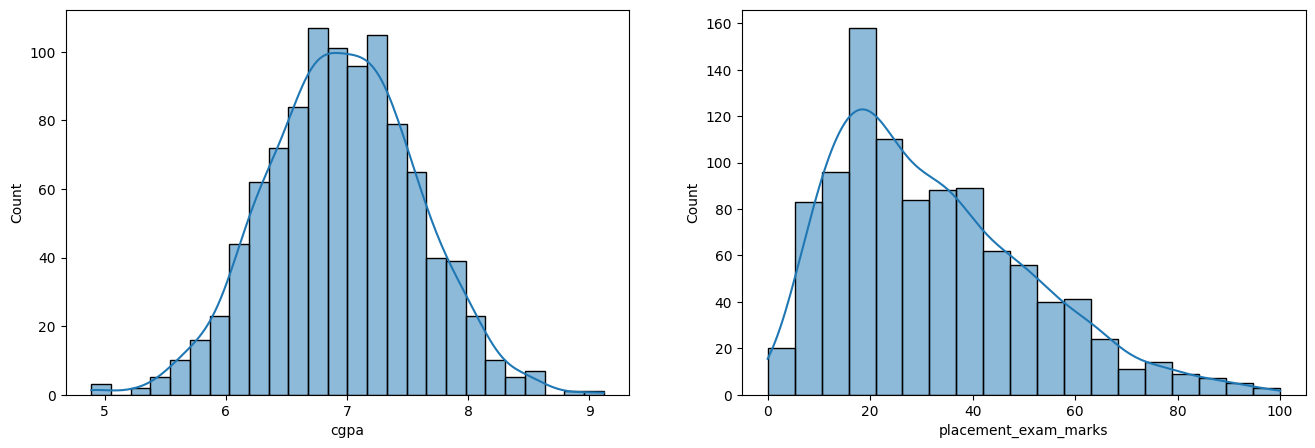

In [5]:
plt.figure(figsize=(16, 5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)

plt.show()

In [6]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [7]:
mean = df['cgpa'].mean()
std = df['cgpa'].std()
mean, std

(6.96124, 0.6158978751323896)

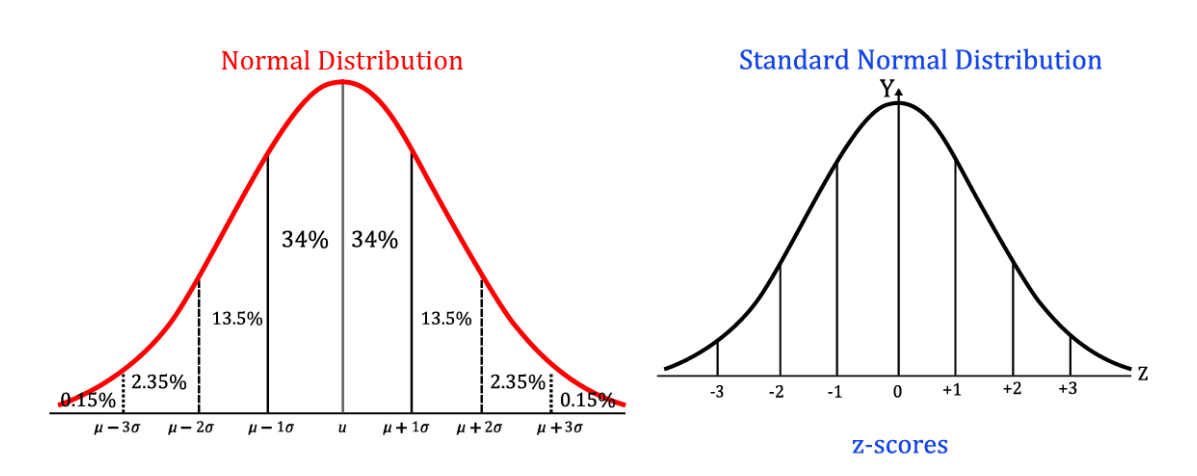

In [8]:
from PIL import Image
import requests
from io import BytesIO

url = "https://editor.analyticsvidhya.com/uploads/59761zscore2.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [9]:
# biasanya otlier itu, lebih kecil dari rata2 - 3 * std
# atau lebih besar dari rata - rata + 3 * std
# 3 disini adalah threshold, ada juga yang menggunakan 2    
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()
upper_limit, lower_limit

(8.808933625397168, 5.113546374602832)

In [10]:
df[(df['cgpa'] > upper_limit) | (df['cgpa'] < lower_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [11]:
df['z_score'] = (df['cgpa'] - mean) / std

In [12]:
df[(df['z_score'] > 3) | (df['z_score'] < -3)]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [13]:
out_index = df[(df['z_score'] > 3) | (df['z_score'] < -3)].index
df.drop(index=out_index, inplace=True, axis=0)

In [14]:
df[(df['z_score'] > 3) | (df['z_score'] < -3)]

,cgpa,placement_exam_marks,placed,z_score


In [15]:
# outlier telah dihapus

In [16]:
df.reset_index(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 995 non-null    int64  
 1   cgpa                  995 non-null    float64
 2   placement_exam_marks  995 non-null    float64
 3   placed                995 non-null    int64  
 4   z_score               995 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 39.0 KB
